Python code on inputting Data file, understanding the variables, Missing Value treatment, Data Cleaning, Graphical Summary and T-Test

In [1]:
import pandas as pd
import numpy as np
autos = pd.read_csv(r"Auto.csv")

In [2]:
autos

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
autos.head( 5 )


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [5]:
autos[["mpg", "displacement","horsepower","weight","acceleration"]].describe()

,mpg,displacement,weight,acceleration
count,397.000000,397.000000,397.000000,397.000000
mean,23.515869,193.532746,2970.261965,15.555668
std,7.825804,104.379583,847.904119,2.749995
min,9.000000,68.000000,1613.000000,8.000000
25%,17.500000,104.000000,2223.000000,13.800000
50%,23.000000,146.000000,2800.000000,15.500000
75%,29.000000,262.000000,3609.000000,17.100000
max,46.600000,455.000000,5140.000000,24.800000


In [6]:
autos["horsepower"].isnull().values.any()

False

In [7]:
autos["horsepower"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
392    False
393    False
394    False
395    False
396    False
Name: horsepower, Length: 397, dtype: bool

In [8]:
autos["horsepower"] = pd.to_numeric( autos["horsepower"], errors = 'coerce' )

In [9]:
autos[["horsepower"]].describe()

,horsepower
count,392.000000
mean,104.469388
std,38.491160
min,46.000000
25%,75.000000
50%,93.500000
75%,126.000000
max,230.000000


In [10]:
autos.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392     86.0
393     52.0
394     84.0
395     79.0
396     82.0
Name: horsepower, Length: 397, dtype: float64

In [11]:
autos["horsepower"].isnull().values.any()

True

In [12]:
autos["horsepower"].isnull().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [13]:
autos.loc[autos["horsepower"].isnull().values]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


In [14]:
autos.isnull().values.any()

True

In [15]:
autos = autos.dropna()

In [16]:
autos.isnull().values.any()

False

In [17]:
autos[["mpg", "displacement","horsepower","weight","acceleration"]].describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


In [18]:
get_ipython().magic('matplotlib inline')
import seaborn as sn
import matplotlib.pyplot as plt

In [19]:
get_ipython().run_cell_magic('time', '', "# To understand how much time it would take to run a particular command\nmpg_cylinders_df = autos.groupby('cylinders')['mpg'].mean().reset_index()")

Wall time: 3.99 ms


In [20]:
get_ipython().run_cell_magic('time', '', "nmpg_cylinders_df = autos.groupby('cylinders')['mpg'].mean().reset_index()")

Wall time: 2.99 ms


In [21]:
mpg_cylinders_df = autos.groupby('cylinders')['mpg'].mean().reset_index()

In [22]:
mpg_cylinders_df

,cylinders,mpg
0,3,20.550000
1,4,29.283920
2,5,27.366667
3,6,19.973494
4,8,14.963107


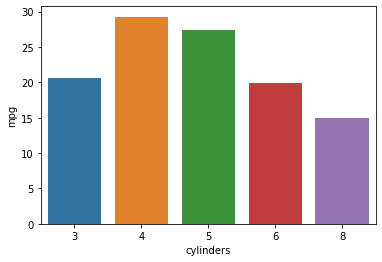

In [23]:
sn.barplot( y = 'mpg',
          x = 'cylinders',
          data = mpg_cylinders_df )

In [24]:
mpg_cylinders_df.sort_values('mpg')['cylinders']

4    8
3    6
0    3
2    5
1    4
Name: cylinders, dtype: int64

In [25]:
mpg_cylinders_df.sort_values('cylinders')['mpg']

0    20.550000
1    29.283920
2    27.366667
3    19.973494
4    14.963107
Name: mpg, dtype: float64

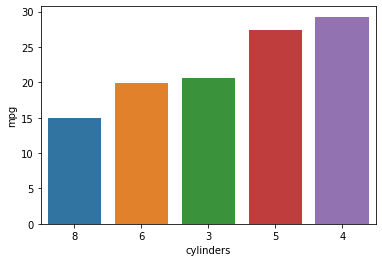

In [26]:
sn.barplot( y = 'mpg',
          x = 'cylinders',
          data = mpg_cylinders_df,
          order = mpg_cylinders_df.sort_values('mpg')['cylinders'])

In [27]:
mpg_cylinders_origin_df = autos.groupby(['cylinders', 'origin'])['mpg'].mean().reset_index()
mpg_cylinders_origin_df

,cylinders,origin,mpg
0,3,3,20.550000
1,4,1,28.013043
2,4,2,28.106557
3,4,3,31.595652
4,5,2,27.366667
5,6,1,19.645205
6,6,2,20.100000
7,6,3,23.883333
8,8,1,14.963107


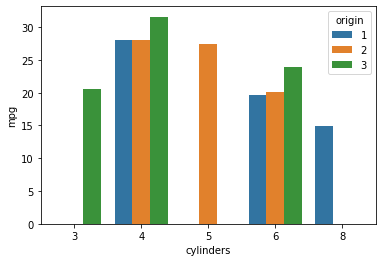

In [28]:
sn.barplot( y = 'mpg',
          x = 'cylinders',
          data = mpg_cylinders_origin_df,
          hue= 'origin');

C:\Users\sidha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sidha\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


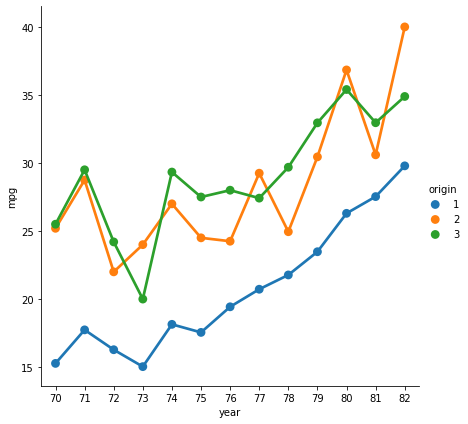

In [29]:
mpg_year_origin_df = autos.groupby(['year', 'origin'])['mpg'].mean().reset_index()
sn.factorplot( x = 'year', y = 'mpg', hue = 'origin', kind = 'point', data = mpg_year_origin_df, size = 6 )

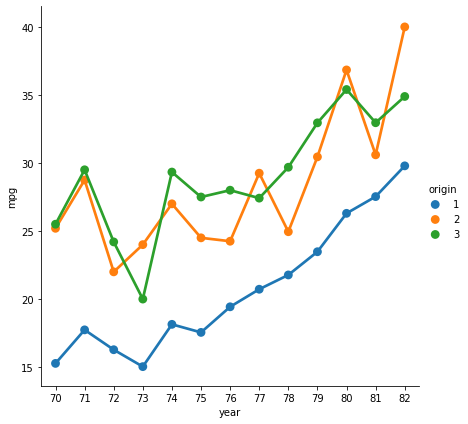

In [30]:
sn.catplot( x = 'year', y = 'mpg', hue = 'origin', kind = 'point', data = mpg_year_origin_df, height = 6 )

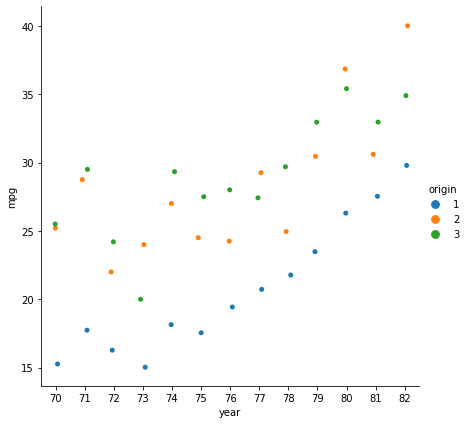

In [31]:
sn.catplot( x = 'year', y = 'mpg', hue = 'origin', kind = 'strip', data = mpg_year_origin_df, height = 6 )

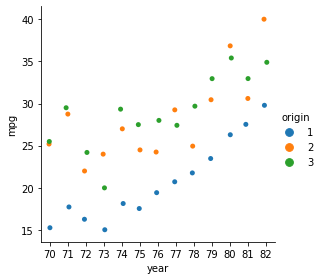

In [32]:
sn.catplot( x = 'year', y = 'mpg', hue = 'origin', kind = 'strip', data = mpg_year_origin_df, height = 4, aspect=1)

(array([13., 78., 73., 58., 53., 48., 37., 22.,  4.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <a list of 10 Patch objects>)

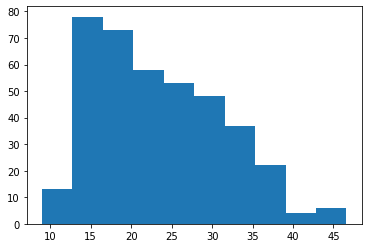

In [33]:
plt.hist( autos.mpg )

(array([ 1.,  2.,  4.,  6.,  0., 20., 19., 17.,  5., 17.,  8., 25.,  7.,
        18., 15., 14.,  5., 13., 10., 16.,  4., 15., 15., 14.,  5., 13.,
         9., 12.,  3., 11., 12.,  8.,  5.,  8.,  4.,  7.,  3.,  5.,  6.,
         1.,  2.,  0.,  1.,  1.,  0.,  2.,  2.,  1.,  0.,  1.]),
 array([ 9.   ,  9.752, 10.504, 11.256, 12.008, 12.76 , 13.512, 14.264,
        15.016, 15.768, 16.52 , 17.272, 18.024, 18.776, 19.528, 20.28 ,
        21.032, 21.784, 22.536, 23.288, 24.04 , 24.792, 25.544, 26.296,
        27.048, 27.8  , 28.552, 29.304, 30.056, 30.808, 31.56 , 32.312,
        33.064, 33.816, 34.568, 35.32 , 36.072, 36.824, 37.576, 38.328,
        39.08 , 39.832, 40.584, 41.336, 42.088, 42.84 , 43.592, 44.344,
        45.096, 45.848, 46.6  ]),
 <a list of 50 Patch objects>)

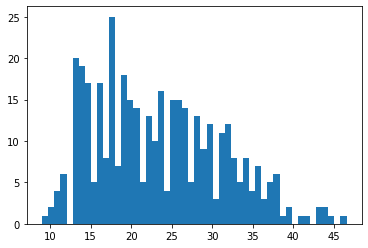

In [34]:
plt.hist( autos.mpg, bins = 50 )

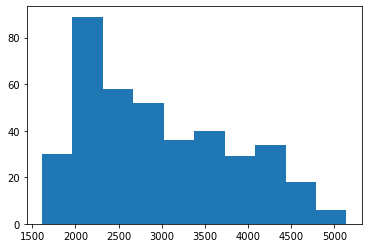

In [35]:
plt.hist( autos.weight );

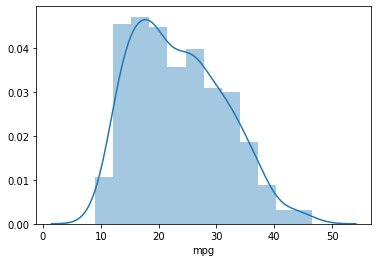

In [36]:
sn.distplot( autos.mpg )

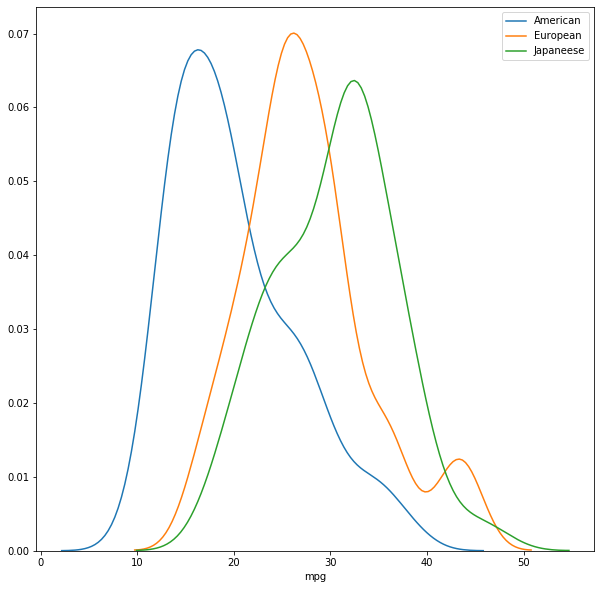

In [37]:
plt.figure(figsize=(10,10))
sn.distplot( autos[autos.origin == 1].mpg, hist = False, label= 'American' )
sn.distplot( autos[autos.origin == 2].mpg, hist = False, label= 'European' )
sn.distplot( autos[autos.origin == 3].mpg, hist = False, label= 'Japaneese' )

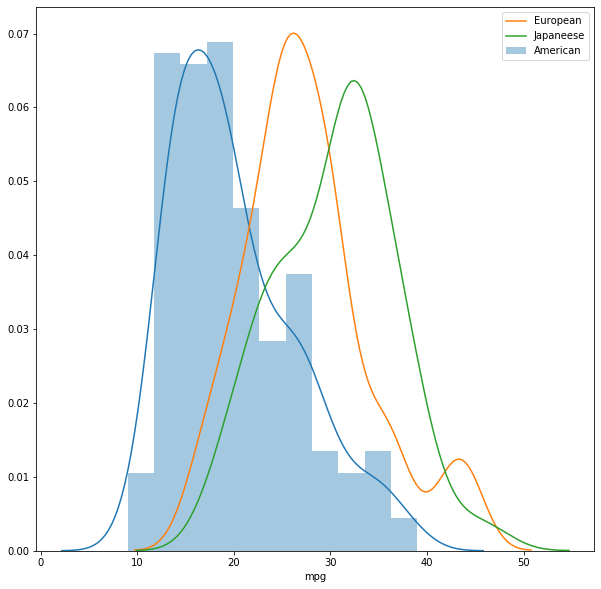

In [38]:
plt.figure(figsize=(10,10))
sn.distplot( autos[autos.origin == 1].mpg, hist = True, label= 'American' )
sn.distplot( autos[autos.origin == 2].mpg, hist = False, label= 'European' )
sn.distplot( autos[autos.origin == 3].mpg, hist = False, label= 'Japaneese' )

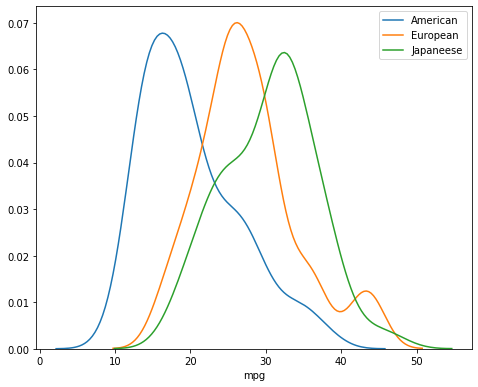

In [39]:
plt.figure(figsize=(7.8,6.3))
sn.distplot( autos[autos.origin == 1].mpg, hist = False, label= 'American' )
sn.distplot( autos[autos.origin == 2].mpg, hist = False, label= 'European' )
sn.distplot( autos[autos.origin == 3].mpg, hist = False, label= 'Japaneese' )

In [40]:
mpg_desc = autos.mpg.describe()
mpg_desc['mean']

23.44591836734694

In [41]:
sn.set(rc={"figure.figsize": (8, 6)})

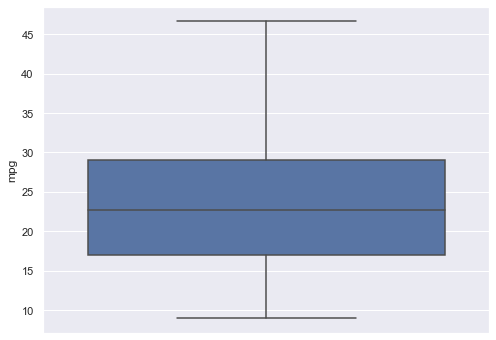

In [42]:
sn.boxplot( y = autos.mpg )

In [43]:
sn.set(rc={"figure.figsize": (2, 2)})

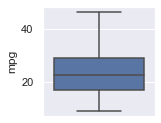

In [44]:
sn.boxplot( y = autos.mpg )

In [45]:
sn.set(color_codes= True, rc={"figure.figsize": (2, 2)})

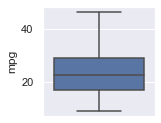

In [46]:
sn.boxplot( y = autos.mpg )

In [47]:
autos.cylinders.unique() 

array([8, 4, 6, 3, 5], dtype=int64)

In [48]:
sn.set(rc={"figure.figsize": (10, 6)})

AttributeError: module 'seaborn' has no attribute 'title'

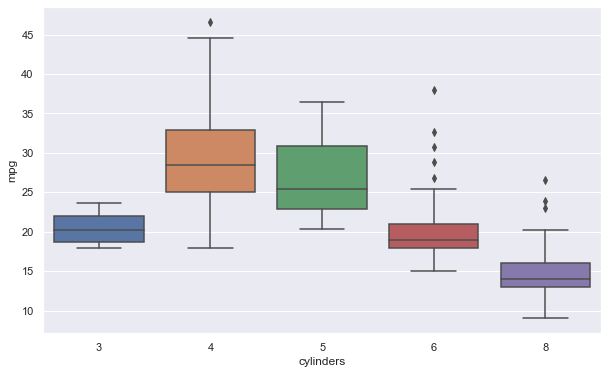

In [49]:
sn.boxplot( x = autos.cylinders,
          y = autos.mpg,
          order = autos.cylinders.unique().sort() )
sn.title( "Box plots for various cylinder counts")

Text(0.5, 1.0, 'Box plots for various cylinder counts')

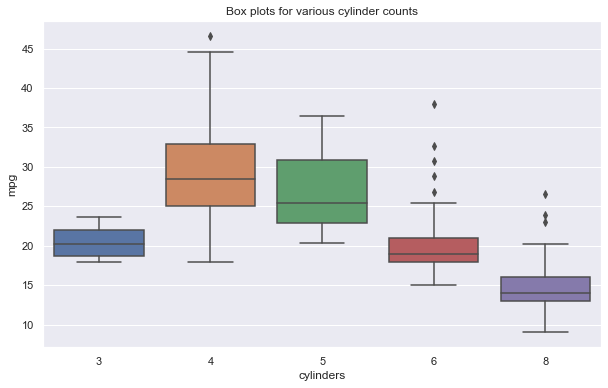

In [50]:
sn.boxplot( x = autos.cylinders,
          y = autos.mpg,
          order = autos.cylinders.unique().sort() ).set_title( "Box plots for various cylinder counts")

Text(0.5, 1.0, 'Box plots for various cylinder counts')

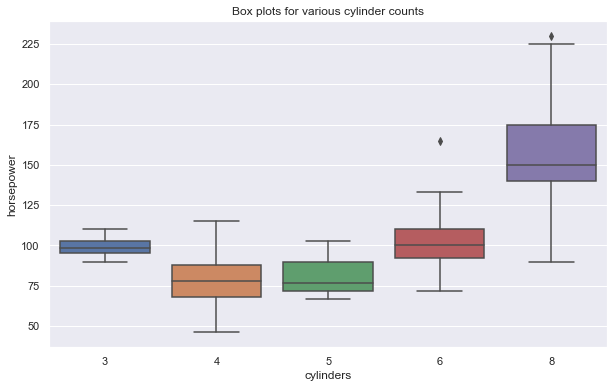

In [51]:
sn.boxplot( x = autos.cylinders,
          y = autos.horsepower,
          order = autos.cylinders.unique().sort() ).set_title( "Box plots for various cylinder counts")

In [52]:
autos[autos.cylinders == 6].mpg.quantile( 0.75 )

21.0

In [53]:
import scipy.stats as sts

In [54]:
sts.iqr( autos[autos.cylinders == 6].mpg )

3.0

In [55]:
sts.iqr( autos[autos.cylinders == 6].mpg, interpolation = 'lower' )

3.0

In [56]:
outlier = autos[autos.cylinders == 6].mpg.quantile( 0.75 ) + 3 * sts.iqr(autos[autos.cylinders == 6].mpg)
outlier

30.0

In [57]:
autos[autos.cylinders == 6][ autos[autos.cylinders == 6].mpg > outlier ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
333,32.7,6,168.0,132.0,2910,11.4,80,3,datsun 280-zx
360,30.7,6,145.0,76.0,3160,19.6,81,2,volvo diesel
386,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


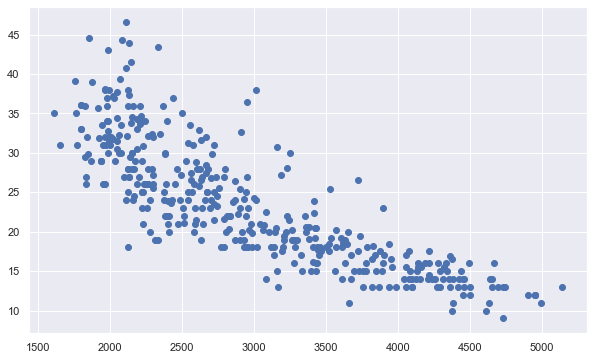

In [58]:
plt.scatter( autos.weight, autos.mpg )

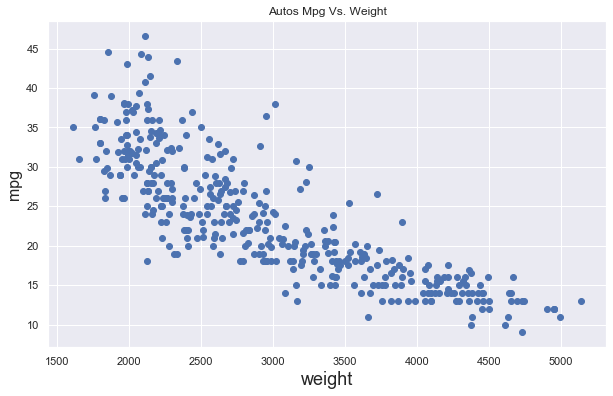

In [59]:
plt.scatter( autos.weight, autos.mpg )
plt.title("Autos Mpg Vs. Weight")
plt.xlabel('weight', fontsize=18)
plt.ylabel('mpg', fontsize=16)
plt.savefig('test.jpg')

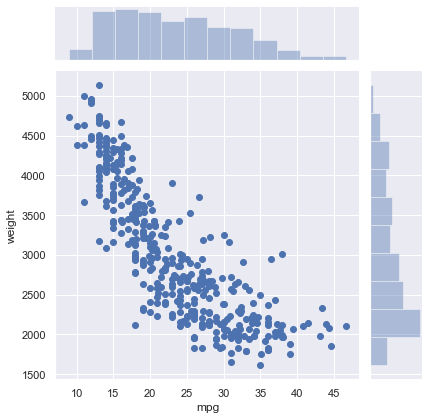

In [60]:
sn.jointplot( autos.mpg, autos.weight, height = 6 )

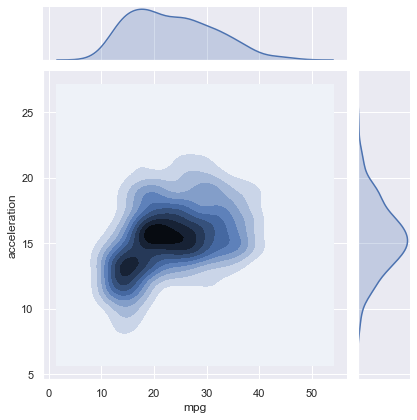

In [61]:
sn.jointplot(x="mpg", y="acceleration", data=autos, kind="kde")

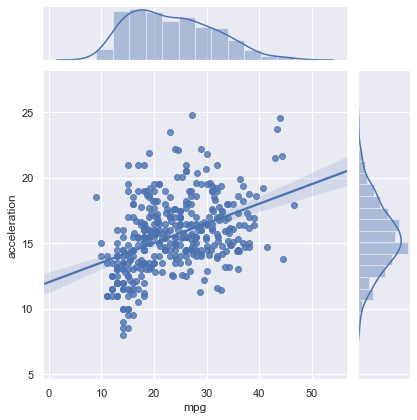

In [62]:
sn.jointplot(x="mpg", y="acceleration", data=autos, kind="reg")

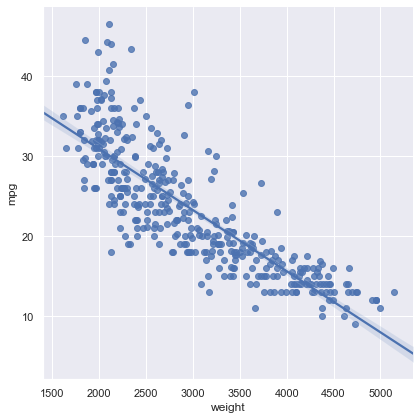

In [63]:
sn.lmplot(x="weight", y="mpg", data= autos, fit_reg = True, height = 6 )

In [64]:
autos_stats = autos[['mpg', 'displacement','weight', 'acceleration']]

In [65]:
autos_stats

,mpg,displacement,weight,acceleration
0,18.0,307.0,3504,12.0
1,15.0,350.0,3693,11.5
2,18.0,318.0,3436,11.0
3,16.0,304.0,3433,12.0
4,17.0,302.0,3449,10.5
...,...,...,...,...
392,27.0,140.0,2790,15.6
393,44.0,97.0,2130,24.6
394,32.0,135.0,2295,11.6
395,28.0,120.0,2625,18.6


<Figure size 432x432 with 0 Axes>

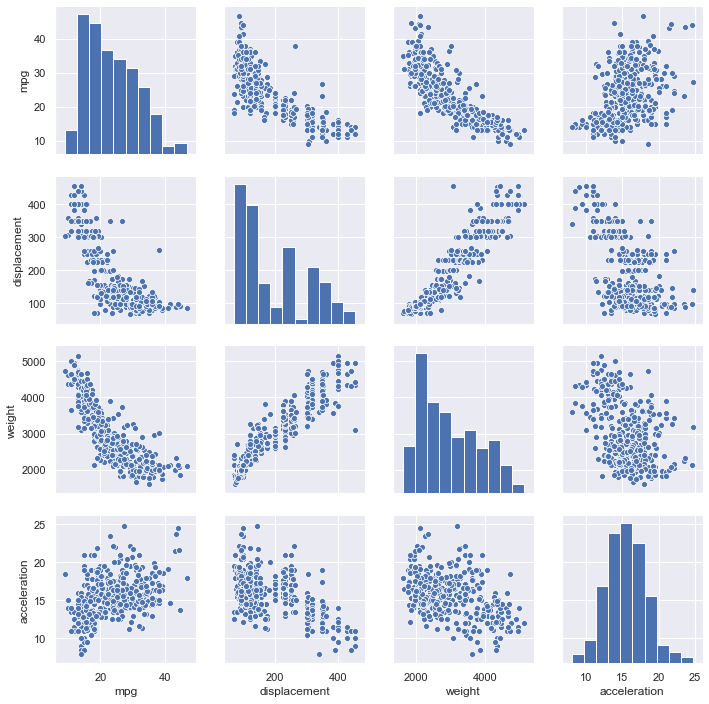

In [66]:
plt.figure( figsize = (6,6));
sn.pairplot( autos_stats )

AttributeError: module 'seaborn' has no attribute 'savefig'

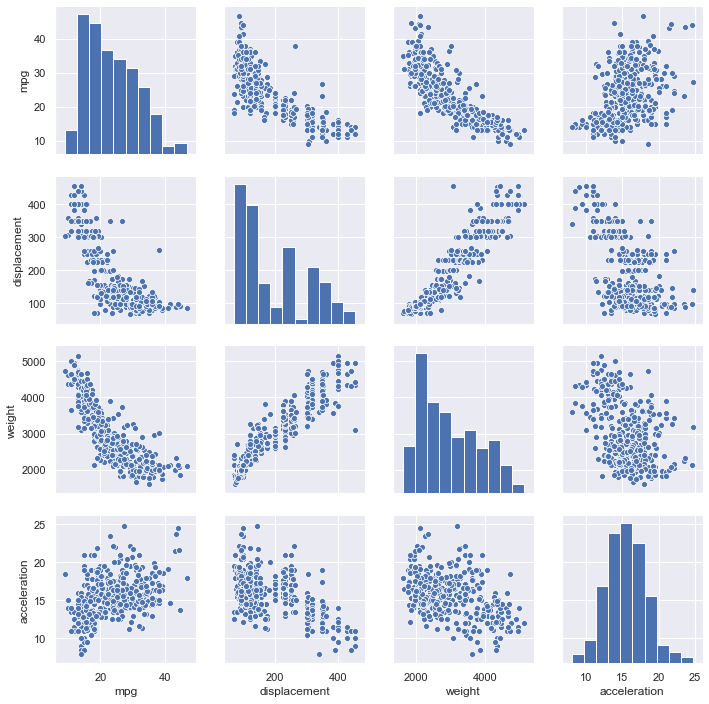

In [67]:
sn.pairplot( autos_stats )
sn.savefig("x.jpg")

In [68]:
autos_stats.corr()

,mpg,displacement,weight,acceleration
mpg,1.000000,-0.805127,-0.832244,0.423329
displacement,-0.805127,1.000000,0.932994,-0.543800
weight,-0.832244,0.932994,1.000000,-0.416839
acceleration,0.423329,-0.543800,-0.416839,1.000000


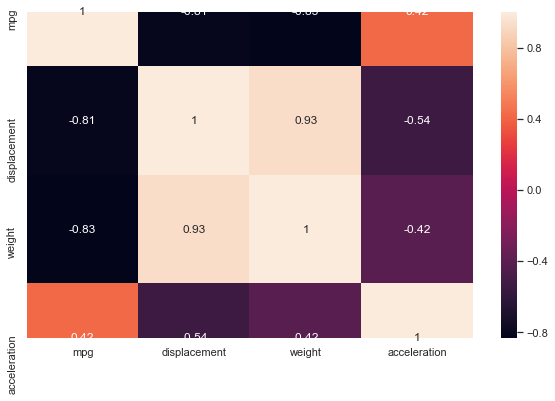

In [69]:
sn.heatmap( autos_stats.corr(), annot = True )

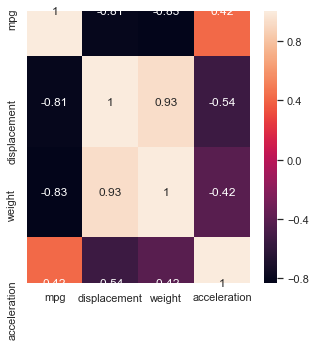

In [70]:
plt.figure( figsize = (5,5))
sn.heatmap( autos_stats.corr(), annot = True )

In [71]:
autos_subset_df = autos[['mpg', 'displacement', 'weight', 'acceleration', 'origin']]
auto_melt_df = pd.melt(autos_subset_df, "origin", var_name="measures")
auto_melt_df.sample( 10 )

,origin,measures,value
301,3,mpg,31.8
861,2,weight,2979.0
757,1,displacement,112.0
526,1,displacement,302.0
346,1,mpg,34.7
1435,1,acceleration,15.1
328,3,mpg,33.8
754,1,displacement,112.0
1022,2,weight,2190.0
1474,1,acceleration,22.2


In [72]:
auto_melt_df.sample( 10 )

,origin,measures,value
293,1,mpg,35.7
783,1,displacement,119.0
1232,3,acceleration,15.5
439,1,displacement,250.0
1327,1,acceleration,16.0
410,3,displacement,97.0
349,2,mpg,33.0
474,1,displacement,98.0
199,1,mpg,18.5
1033,1,weight,3570.0


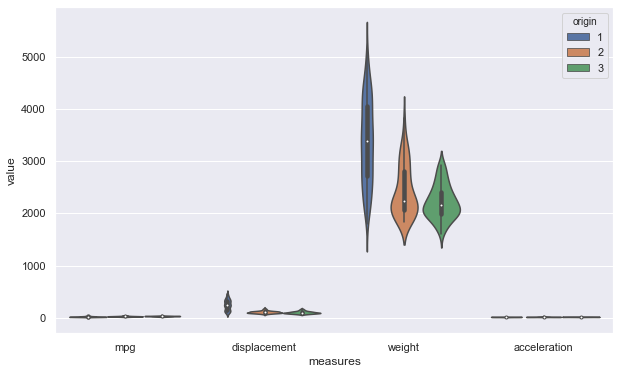

In [73]:
sn.violinplot(x="measures", y="value", hue="origin", data=auto_melt_df)

In [75]:
autos_subset2_df = autos_subset_df.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)

In [76]:
autos_subset_df

,mpg,displacement,weight,acceleration,origin
0,18.0,307.0,3504,12.0,1
1,15.0,350.0,3693,11.5,1
2,18.0,318.0,3436,11.0,1
3,16.0,304.0,3433,12.0,1
4,17.0,302.0,3449,10.5,1
...,...,...,...,...,...
392,27.0,140.0,2790,15.6,1
393,44.0,97.0,2130,24.6,2
394,32.0,135.0,2295,11.6,1
395,28.0,120.0,2625,18.6,1


In [77]:
autos_subset2_df

,mpg,displacement,weight,acceleration,origin
0,0.239362,0.617571,0.536150,0.238095,0.0
1,0.159574,0.728682,0.589736,0.208333,0.0
2,0.239362,0.645995,0.516870,0.178571,0.0
3,0.186170,0.609819,0.516019,0.238095,0.0
4,0.212766,0.604651,0.520556,0.148810,0.0
...,...,...,...,...,...
392,0.478723,0.186047,0.333711,0.452381,0.0
393,0.930851,0.074935,0.146583,0.988095,0.5
394,0.611702,0.173127,0.193365,0.214286,0.0
395,0.505319,0.134367,0.286929,0.630952,0.0


In [78]:
autos_subset3_df = autos_subset_df.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 1)

In [79]:
autos_subset3_df

,mpg,displacement,weight,acceleration,origin
0,0.004853,0.087354,1.0,0.003140,0.0
1,0.003792,0.094529,1.0,0.002844,0.0
2,0.004949,0.092285,1.0,0.002911,0.0
3,0.004371,0.088287,1.0,0.003205,0.0
4,0.004640,0.087297,1.0,0.002755,0.0
...,...,...,...,...,...
392,0.009322,0.049839,1.0,0.005235,0.0
393,0.019737,0.044643,1.0,0.010620,0.0
394,0.013514,0.058413,1.0,0.004621,0.0
395,0.010290,0.045351,1.0,0.006707,0.0


In [80]:
auto_melt2_df = pd.melt(autos_subset2_df, "origin", var_name="measures")

In [81]:
auto_melt2_df

,origin,measures,value
0,0.0,mpg,0.239362
1,0.0,mpg,0.159574
2,0.0,mpg,0.239362
3,0.0,mpg,0.186170
4,0.0,mpg,0.212766
...,...,...,...
1563,0.0,acceleration,0.452381
1564,0.5,acceleration,0.988095
1565,0.0,acceleration,0.214286
1566,0.0,acceleration,0.630952


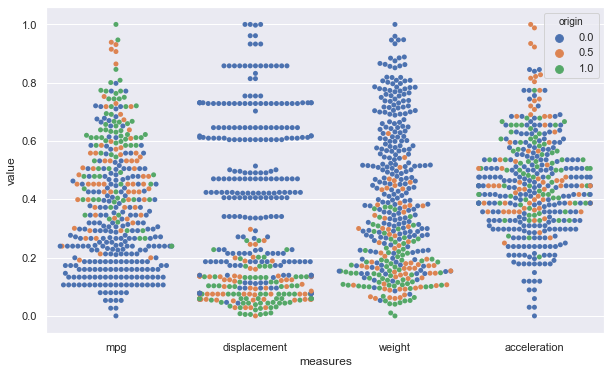

In [82]:
sn.swarmplot(x="measures", y="value", hue="origin", data=auto_melt2_df);


In [83]:
from scipy import stats
stats.ttest_ind( autos[ autos.origin == 1]["mpg"],
              autos[ autos.origin == 3 ]["mpg"],
              equal_var=True)


Ttest_indResult(statistic=-12.664889006229084, pvalue=4.17283714676552e-30)